# Phase 1: Data Ingestion and Cleaning

In [73]:
#Importing all the relevant packages

import numpy as np
import pandas as pd

import os
import pickle
from sys import platform

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

import seaborn as sns
color = sns.color_palette()
sns.set(font_scale=1.5)

import datetime

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [74]:
#Reading the zip files directly into a dataframe
extension = ".zip"
df = pd.DataFrame()        
for item in os.listdir():
    if item.endswith(extension):
        filename = os.path.basename(item)
        file_df = pd.read_csv(filename, dtype = str, skiprows = 1)
        print(f"{filename} : {file_df.shape}")
        df = pd.concat([df, file_df], axis = 0)
        print(f"Concatenated dataframe size : {df.shape}")

#Remove rows where there is the text summary line and retaining remaining rows with data
df = df.loc[df.id.isna(),:]

LoanStats_2016Q1.csv.zip : (133889, 145)
Concatenated dataframe size : (133889, 145)
LoanStats_2016Q2.csv.zip : (97856, 145)
Concatenated dataframe size : (231745, 145)
LoanStats_2016Q3.csv.zip : (99122, 145)
Concatenated dataframe size : (330867, 145)
LoanStats_2016Q4.csv.zip : (103548, 145)
Concatenated dataframe size : (434415, 145)
LoanStats_2017Q1.csv.zip : (96781, 145)
Concatenated dataframe size : (531196, 145)
LoanStats_2017Q2.csv.zip : (105453, 145)
Concatenated dataframe size : (636649, 145)
LoanStats_2017Q3.csv.zip : (122703, 145)
Concatenated dataframe size : (759352, 145)
LoanStats_2017Q4.csv.zip : (118650, 145)
Concatenated dataframe size : (878002, 145)
LoanStats_2018Q1.csv.zip : (107866, 145)
Concatenated dataframe size : (985868, 145)
LoanStats_2018Q2.csv.zip : (130774, 145)
Concatenated dataframe size : (1116642, 145)


In [75]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,5000,36 months,17.27%,178.94,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,22000,22000,22000,36 months,6.49%,674.18,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000,60 months,10.75%,648.54,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000,10000,10000,36 months,16.29%,353.01,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000,12000,12000,36 months,9.75%,385.8,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Handling missing values

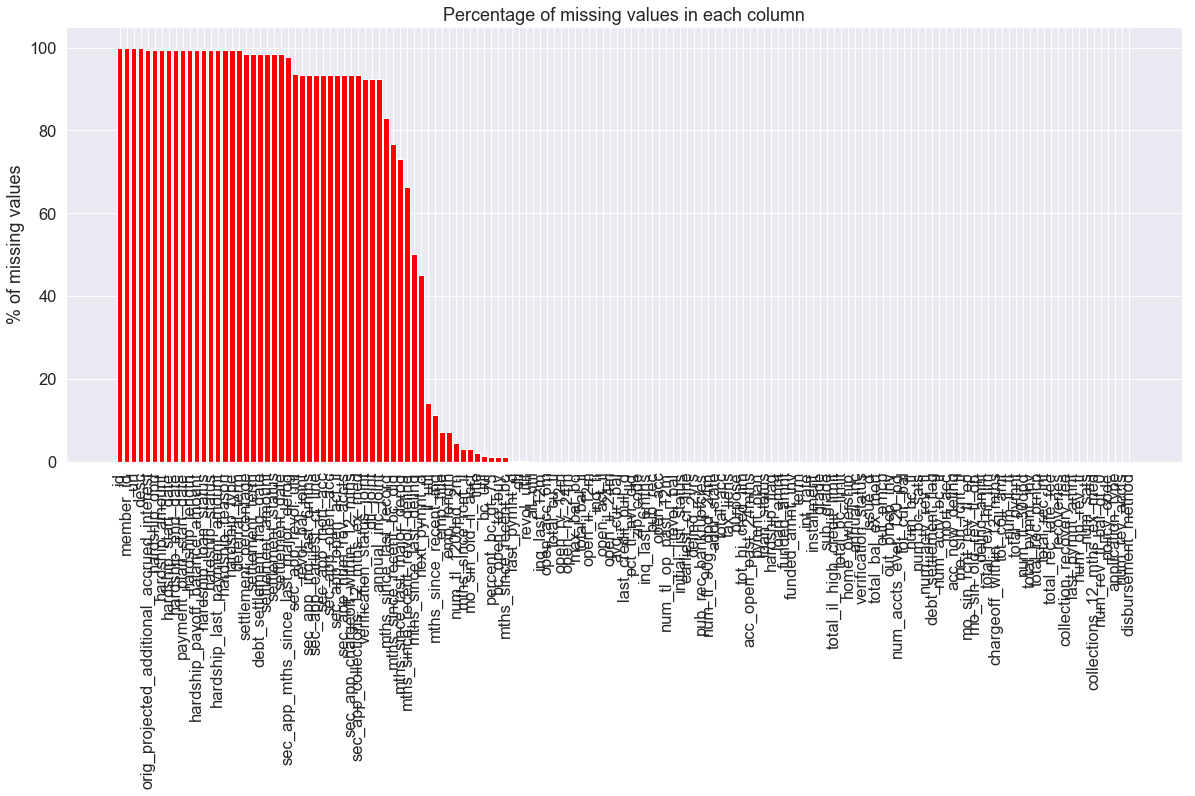

In [76]:
null_col_df = df.isnull().sum(axis=0).sort_values(ascending=False).reset_index()
null_col_df.columns = ['column_name', 'missing_count']
null_col_df['missing_count'] = 100*((null_col_df['missing_count'])/len(df))
y = np.arange(null_col_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(y, null_col_df.missing_count.values, color='red')
ax.set_xticks(y)
ax.set_xticklabels(null_col_df.column_name.values, rotation = 'vertical')
ax.set_ylabel("% of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

In [77]:
df = df.dropna(thresh=0.6*len(df), axis=1)

In [78]:
#Dropped some features having more than 95% missing values, reduces columns from 145 to 97
df.shape

(1116622, 101)

In [79]:
#leakage columns
#total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection, _recovery_fee, last_pymnt_d, 
#last_pymnt_amnt, last_credit_pull_d, total_bal_ex_mort, bc_open_to_buy, last_pymnt_d, num_tl_120dpd_2m

In [80]:
#same values
#policy_code, 
#could do binning for
#tot_coll_amt, tot_cur_bal, acc_now_delinq

In [81]:
#Identifying the type of each column
# Identify the type of each of these column
float_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'total_pymnt', 'recoveries',
             'inq_last_6mths','pub_rec', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 
             'total_rec_prncp', 'total_rec_int', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
             'tot_cur_bal', 'inq_fi','inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 
              'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pub_rec_bankruptcies',
                'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
             'pct_tl_nvr_dlq', 'percent_bc_gt_75']
cat_cols =['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose', 'pymnt_plan', 'zip_code', 'addr_state',
               'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
perc_cols = ['int_rate']
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']

In [ ]:
#44 columns had close to 70% missing values - removing them
#16 columns had leakage - information generated after loan was issued

In [84]:
df = df[float_cols+cat_cols+perc_cols+date_cols]

In [85]:
#Looking at the other columns with missing values
null_col_df = df.isnull().sum(axis=0).sort_values(ascending=False).reset_index()
null_col_df.columns = ['column_name', 'missing_count']
null_col_df['missing_count'] = 100*((null_col_df['missing_count'])/len(df))
y = np.arange(null_col_df.shape[0])
missing_df = null_col_df.loc[null_col_df['missing_count'] > 0]

In [86]:
#32 features have missing values 
def determine_type(col):
    if col in float_cols:
        type = 'float'
    elif col in cat_cols:
        type = 'object'
    elif col in date_cols:
        type = 'date'
    else:
        type = 'perc'
    return type

In [87]:
missing_df['type_col'] = missing_df['column_name'].apply(lambda x: determine_type(x))

C:\Users\Pradeep Krishnan\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
missing_df

,column_name,missing_count,type_col
0,emp_length,7.162764,object
1,num_tl_120dpd_2m,4.470806,float
2,mo_sin_old_il_acct,3.058331,float
3,bc_util,1.265961,float
4,percent_bc_gt_75,1.225034,float
5,mths_since_recent_bc,1.152046,float
6,last_pymnt_d,0.130125,date
7,dti,0.104333,float
8,inq_last_12m,0.005552,float
9,inq_fi,0.005463,float


In [89]:
pd.options.display.max_colwidth = -1
datadict_df = pd.read_excel("LCDataDictionary.xlsx")
datadict_df.columns = ['name','description']
datadict_df.loc[datadict_df['name'].isin(missing_df.column_name.values),:].reset_index(drop = True)

,name,description
0,avg_cur_bal,Average current balance of all accounts
1,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
2,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
3,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
4,inq_fi,Number of personal finance inquiries
5,inq_last_12m,Number of credit inquiries in past 12 months
6,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
7,last_pymnt_d,Last month payment was received
8,mo_sin_old_il_acct,Months since oldest bank installment account opened
9,mths_since_recent_bc,Months since most recent bankcard account opened.


In [90]:
df = df.loc[~(df['zip_code'].isna() | df['pct_tl_nvr_dlq'].isna() | df['inq_last_6mths'].isna()), :]

In [91]:
#temporarily dropping empty emp_lengths
df = df.loc[~df['emp_length'].isna(), :]

In [92]:
#Change dtype of columns to proper dtype

In [93]:
for col in df.columns:
    if col in float_cols:
        df[col] = df[col].astype(float)
    elif col in date_cols:
        df[col] = pd.to_datetime(df[col])
    elif col in perc_cols:
        df[col] = df[col].apply(lambda x: x.strip('%'))
        df[col] = df[col].astype(float)

In [94]:
#Fill other missing values by median value of the column for now
df.shape

(1036638, 78)

In [95]:
for col in df:
    if col != 'last_pymnt_d':
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

In [96]:
df.shape

(1036638, 78)

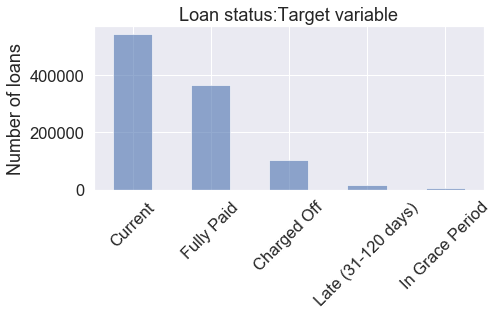

In [97]:
plt.figure(figsize = (7,3))
g = df.loan_status.value_counts()[:5].plot(kind='bar',alpha=.60)
g.set_title("Loan status:Target variable")
g.set_ylabel("Number of loans")
plt.xticks(rotation = 45)
plt.show()

In [98]:
df1 = df.copy()

C:\Anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


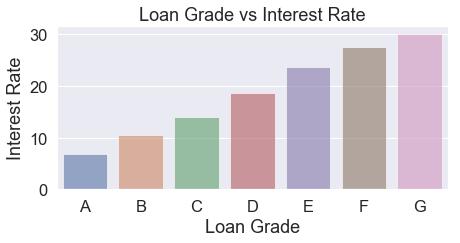

In [99]:
plt.figure(figsize = (7,3))
ax = sns.barplot(alpha=.60, x="grade", y="int_rate", data=df1, order=['A','B','C','D','E','F','G'])
ax.set_xlabel("Loan Grade")
ax.set_ylabel("Interest Rate")
ax.set_title("Loan Grade vs Interest Rate")
plt.show()

In [67]:
df.drop(['loan_amnt'], axis = 1, inplace = True)

In [101]:
df.shape

(1036638, 78)

In [115]:
df3 = df.iloc[:1000,:]

In [129]:
df4 = df3[float_cols1+float_cols2+float_cols3]

In [130]:
df4.drop(['loan_amnt', 'out_prncp_inv', 'total_pymnt_inv'], axis = 1, inplace = True)

C:\Anaconda\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [134]:
vif_df = pd.DataFrame(find_vif(df4)).reset_index()
vif_df.columns = ['feature', 'VIF']

In [135]:
vif_df

,feature,VIF
0,total_pymnt,2.321698e+06
1,total_rec_prncp,1.589830e+06
2,total_rec_int,9.494939e+04
3,recoveries,5.460816e+03
4,open_acc,2.665497e+03
5,num_sats,2.657981e+03
6,total_acc,1.503352e+03
7,num_rev_accts,5.418938e+02
8,num_il_tl,2.689419e+02
9,tot_hi_cred_lim,1.807413e+02


## Handling Multicollinearity - Getting VIFs 

In [120]:
def find_vif(data_df):
    vif_nums = [variance_inflation_factor(data_df.values, i) for i in range(data_df.shape[1])]
    return pd.Series(index=data_df.columns,data=vif_nums).sort_values(ascending=False).head(20)

In [108]:
float_cols1 = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'total_pymnt', 'recoveries', 
              'inq_last_6mths', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 
             'total_rec_prncp', 'total_rec_int', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt']

In [217]:
df1 = df[float_cols1]
df1.shape

(1036638, 21)

In [218]:
find_vif(df1)

total_pymnt                   1.421590e+06
funded_amnt                   1.276289e+06
loan_amnt                     1.276226e+06
total_rec_prncp               7.578442e+05
out_prncp_inv                 6.558262e+05
out_prncp                     6.557827e+05
total_pymnt_inv               3.089022e+05
total_rec_int                 5.730445e+04
recoveries                    2.462030e+03
installment                   3.956628e+01
open_acc                      1.095509e+01
total_acc                     1.090992e+01
dti                           2.970478e+00
revol_bal                     1.763909e+00
inq_last_6mths                1.467269e+00
annual_inc                    1.364959e+00
delinq_2yrs                   1.173398e+00
pub_rec                       1.122200e+00
collections_12_mths_ex_med    1.023334e+00
acc_now_delinq                1.017665e+00
dtype: float64

In [109]:
float_cols2 = ['tot_cur_bal', 'inq_fi','inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts']

In [220]:
df2 = df[float_cols2]
df2.shape

(1036638, 22)

In [221]:
find_vif(df2)

num_rev_accts            39.010373
num_op_rev_tl            34.971259
num_bc_tl                31.159055
num_bc_sats              27.766928
num_actv_bc_tl           27.433998
num_actv_rev_tl          24.619682
tot_cur_bal              8.479828 
mo_sin_old_il_acct       7.152065 
avg_cur_bal              7.070779 
mo_sin_old_rev_tl_op     5.836909 
acc_open_past_24mths     5.390002 
bc_util                  5.105729 
mo_sin_rcnt_rev_tl_op    3.690112 
num_il_tl                3.244249 
mo_sin_rcnt_tl           3.035746 
inq_last_12m             2.794367 
mths_since_recent_bc     2.743818 
mort_acc                 2.664176 
inq_fi                   2.193125 
num_accts_ever_120_pd    1.222034 
dtype: float64

In [110]:
float_cols3 = ['num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
               'pub_rec_bankruptcies','tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
               'total_il_high_credit_limit', 'pct_tl_nvr_dlq', 'percent_bc_gt_75']

In [223]:
df3 = df[float_cols3]
df3.shape

(1036638, 14)

In [224]:
find_vif(df3)

num_sats                      13.506911
total_bal_ex_mort             11.997063
total_il_high_credit_limit    10.845199
num_rev_tl_bal_gt_0           8.180899 
pct_tl_nvr_dlq                7.747231 
total_bc_limit                3.299870 
tot_hi_cred_lim               3.036612 
num_tl_op_past_12m            2.788818 
percent_bc_gt_75              2.613972 
pub_rec_bankruptcies          1.175403 
num_tl_90g_dpd_24m            1.034804 
tax_liens                     1.020857 
num_tl_120dpd_2m              1.004824 
num_tl_30dpd                  1.003625 
dtype: float64

In [225]:
#Identifying the type of each column
# Identify the type of each of these column
def_float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'total_pymnt', 'recoveries']
def_cat_cols = ['term', 'grade', 'emp_length', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose']
def_perc_cols = ['int_rate', 'revol_util']
def_date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']

In [28]:
pickle_file = 'C:\Anaconda\semester1\p2p\p2p_eda_1_data.pickle'

In [29]:
pickle.dump([df, float_cols, cat_cols, perc_cols, date_cols], open(pickle_file, "wb"))

In [30]:
df.to_csv('p2p_eda_1_data.csv', index = False)

In [230]:
#df['term'] = df['term'].apply(lambda x: x.split()[0]).astype(int)